##  PRCP-1021-InsCostPred

# Data Description
        The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns). The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 nominal features (sex, smoker and region) that were converted into factors with numerical value designated for each level.
        In order to make their profit, insurance companies must collect a higher premium than the amount which may become due to the insured person. To achieve this, insurance companies invest a lot of time, effort, and money in creating models that accurately predict healthcare expenses.

# Linear Regression

In [4]:
# import all required libraries

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor #(  Regressor For regression task, classifier for classification task)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the data
data=pd.read_csv('insurance.csv')

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
data.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory Data Analysis

# Univariate Analysis

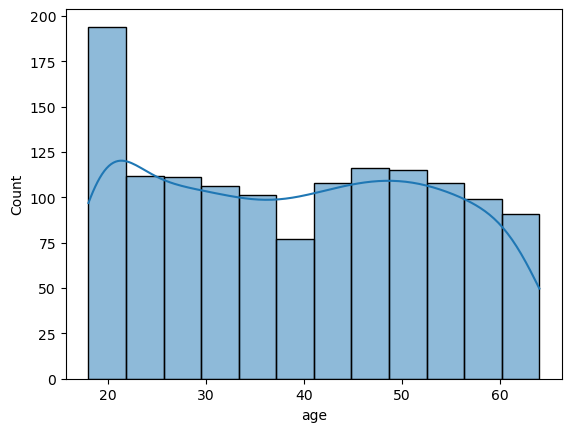

In [10]:
# Analysing Age
sns.histplot(x=data.age,kde=True)
plt.show()

### Insights
* The x-axis ranges from 20 to 70, it indicates that the dataset contains individuals with ages between 20 and 70 years.
* No significant skewness and ages more or less evenly distributed

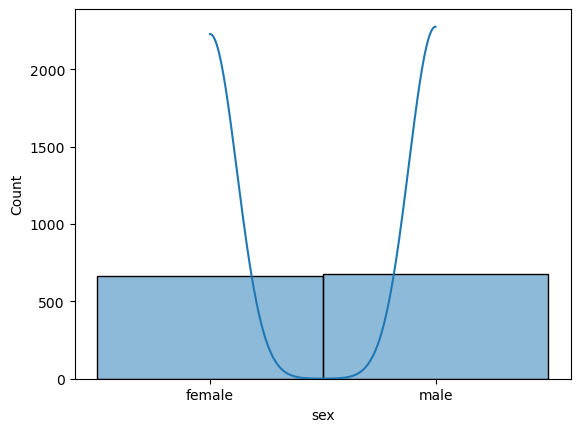

In [11]:
# Analysing sex
sns.histplot(x=data.sex,kde=True)
plt.show()

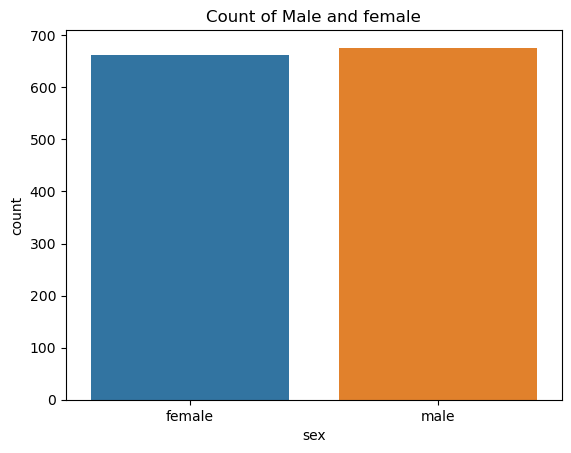

In [12]:
# Create a count plot for the "sex" feature
sns.countplot(x='sex', data=data)
plt.title("Count of Male and female")
plt.show()

In [13]:
# Calculate the frequency count of each category in the "sex" feature
sex_counts = data['sex'].value_counts()

print("Frequency count of each category in the 'sex' feature:\n", sex_counts)

Frequency count of each category in the 'sex' feature:
 male      676
female    662
Name: sex, dtype: int64


### Insights
  * From the output, you can see that there are 676 male individuals and 662 female individuals in the dataset.
  * Note :  "sex" is a categorical feature, the concept of skewness does not apply, and we can analyze the        distribution solely based on frequency counts.

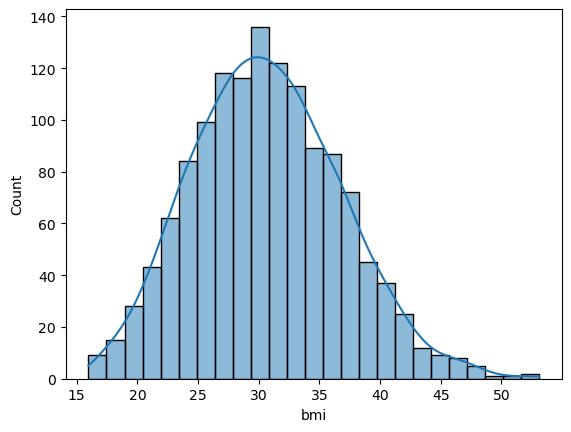

In [14]:
# Analysing bmi
sns.histplot(x=data.bmi,kde=True)
plt.show()


### Insights
* From the above plot we can observe the shape of the distribution, which resembles a normal distribution (bell-shaped curve)
* The x-axis ranges from 20 to 50, it indicates that the dataset contains individuals with BMI values between 20 and 50.
* The distribution is approximately symmetric (no significant skewness) Because  skewness is around 0.028.

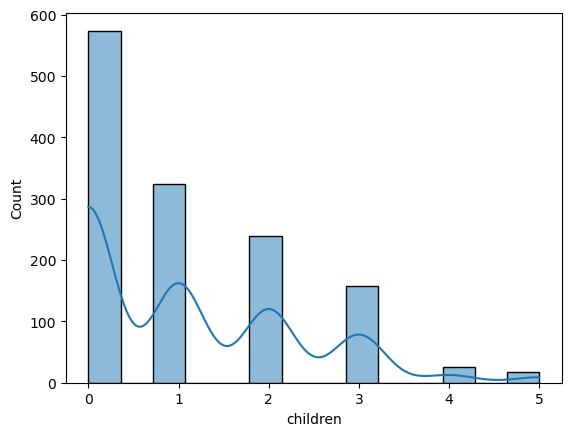

In [15]:
# Analysing children
sns.histplot(x=data.children, kde= True)
plt.show()


In [16]:
# Calculate the frequency count of each category in the "children" feature
children_counts = data['children'].value_counts()

print("Frequency count of each category in the 'children' feature:\n", children_counts)

Frequency count of each category in the 'children' feature:
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


### Insights
  * The maximum number of children observed in a family is 5. Specifically, there are 18 families with 5 children each.
  * In the Insurance Cost Prediction dataset, a total of 574 families have no children, meaning they do not have any dependent children included in their insurance policy.

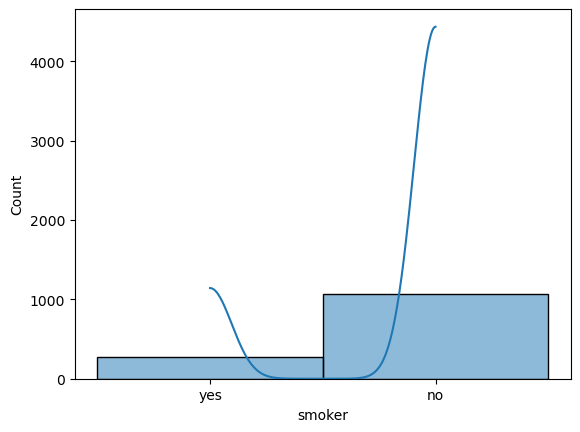

In [17]:
# Analysing smoker
sns.histplot(x=data.smoker, kde= True)
plt.show()

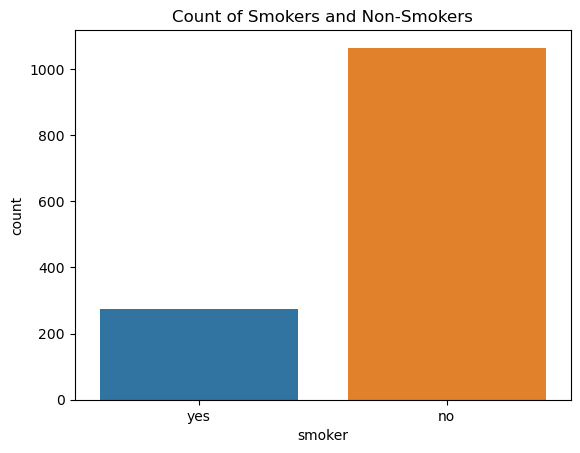

In [18]:
# Create a count plot for the "smoker" feature
sns.countplot(x='smoker', data=data)
plt.title("Count of Smokers and Non-Smokers")
plt.show()

In [19]:
# Calculate the frequency count of each category in the "smoker" feature
smoker_counts = data['smoker'].value_counts()

print("Frequency count of each category in the 'smoker' feature:\n", smoker_counts)

Frequency count of each category in the 'smoker' feature:
 no     1064
yes     274
Name: smoker, dtype: int64


### Insights
  * The number of smokers in the dataset are 274
  * The number of non-smokers in the dataset are 1064
  * Non-smokers in our sample are higher than smokers by a high margin.

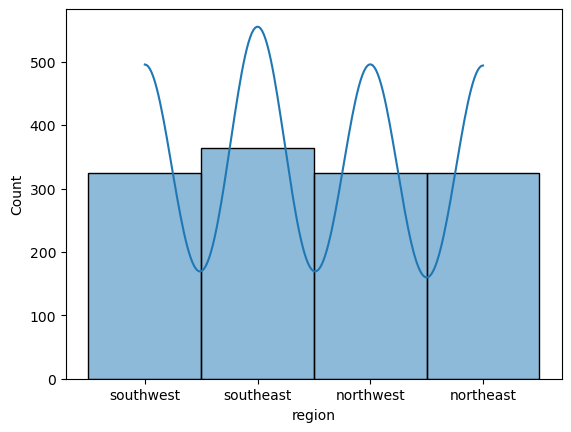

In [20]:
# Analysing Region
sns.histplot(x=data.region, kde= True)
plt.show()

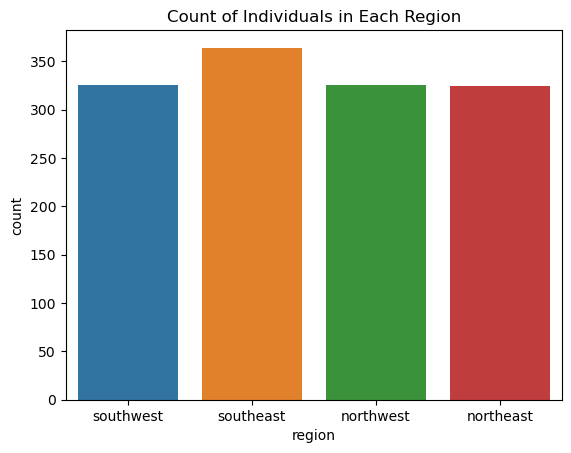

In [21]:
# Create a count plot for the "region" feature
sns.countplot(x='region', data=data)
plt.title("Count of Individuals in Each Region")
plt.show()

In [22]:
# Calculate the frequency count of each category in the "region" feature
region_counts = data['region'].value_counts()

print("Frequency count of each category in the 'region' feature:\n", region_counts)

Frequency count of each category in the 'region' feature:
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


### Insights

* The distribution of individuals across regions gives an idea of the geographic spread of the insured population
* The high count in the "southeast" region  indicates that more individuals from this region have participated in the insurance program.
* The "southeast" region has the highest number of individuals (364), while the other three regions, "northwest," "southwest," and "northeast," have a similar count (around 324-325 each).

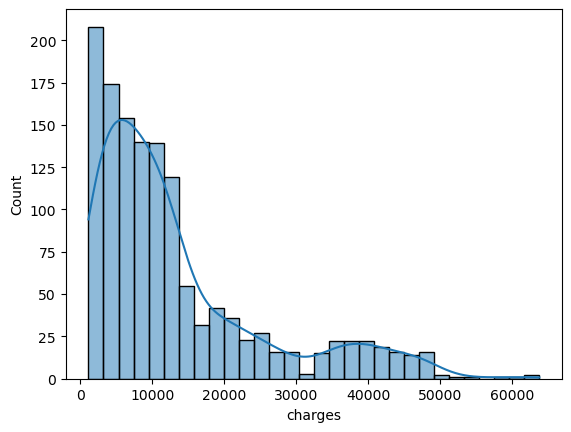

In [23]:
# Analysing Charges
sns.histplot(x=data.charges, kde= True)
plt.show()

In [24]:
# Calculate the skewness of the "charges" feature
charges_skewness = data['charges'].skew()

print("Skewness of charges feature:", charges_skewness)

Skewness of charges feature: 1.5158796580240388


### Insights

* The distribution of individuals across regions gives an idea of the geographic spread of the insured population
* The high count in the "southeast" region  indicates that more individuals from this region have participated in the insurance program.
* The "southeast" region has the highest number of individuals (364), while the other three regions, "northwest," "southwest," and "northeast," have a similar count (around 324-325 each).

In [25]:
# Step 2 Bivariate Analysis

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


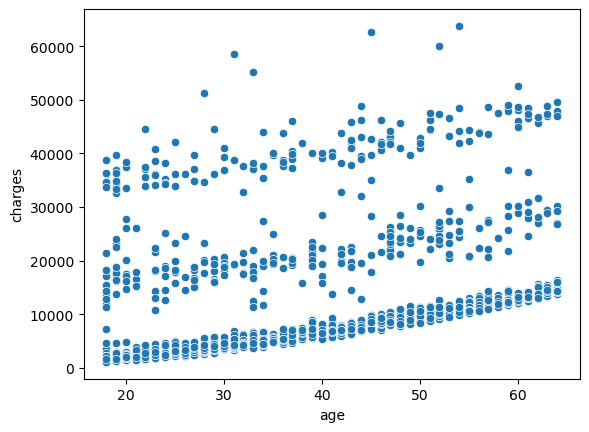

In [27]:
sns.scatterplot(x='age',y='charges',data=data)
plt.show()

### Insights

* Insurance charges increasing as individuals get older.

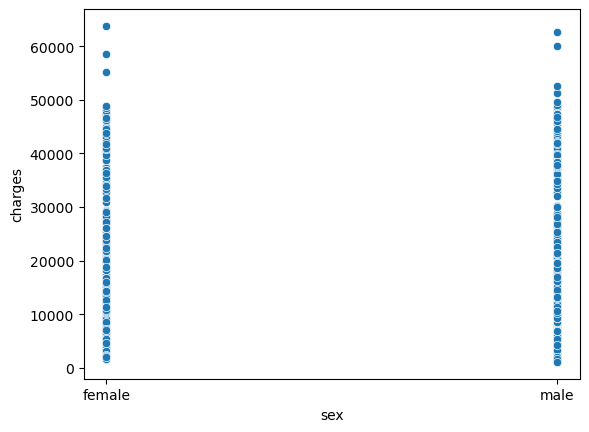

In [28]:
sns.scatterplot(x='sex',y='charges',data=data)
plt.show()

### Insights

* There are visible gaps or patterns between the male and female data points, it suggests that there are differences in insurance charges between the two genders. This could indicate that gender is influencing the insurance costs.
* The max charge for the male gender is higher than that of female

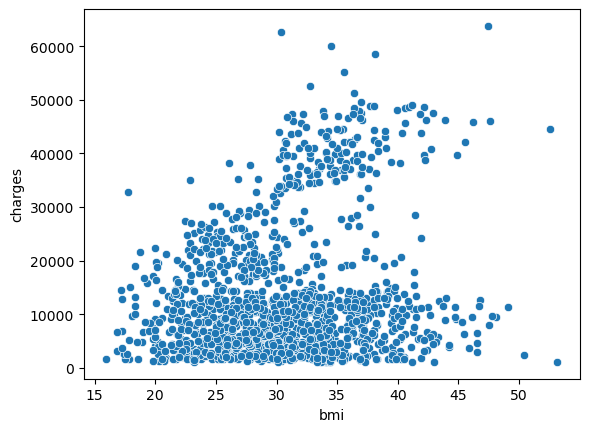

In [29]:
sns.scatterplot(x='bmi',y='charges',data=data)
plt.show()

### Insights

* Those with a BMI of 30 to 40 (median), may seem to be paying a higher charge than the rest

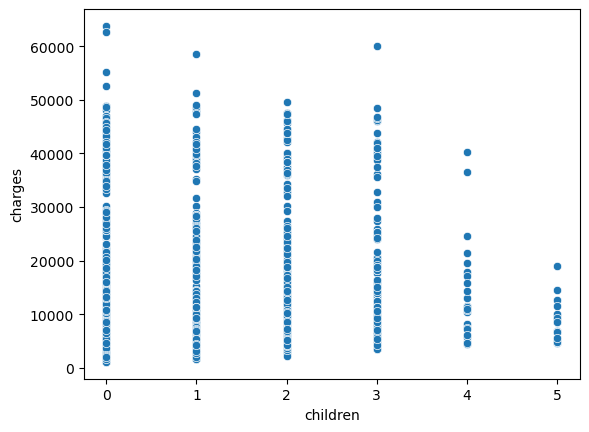

In [30]:
sns.scatterplot(x='children',y='charges',data=data)
plt.show()

### Insights

* From the scatter plot it is seen that the individuals with a larger number of children are charged less v/s those with no or children

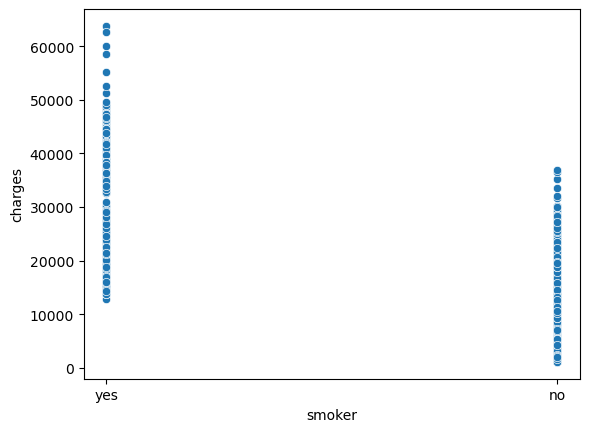

In [31]:
sns.scatterplot(x='smoker',y='charges',data=data)
plt.show()

### Insights

* There is a visible difference seen in the premium charged for smokers v/s non smokers, this could a result of smokers to be at a higher health risk and hence being charged more

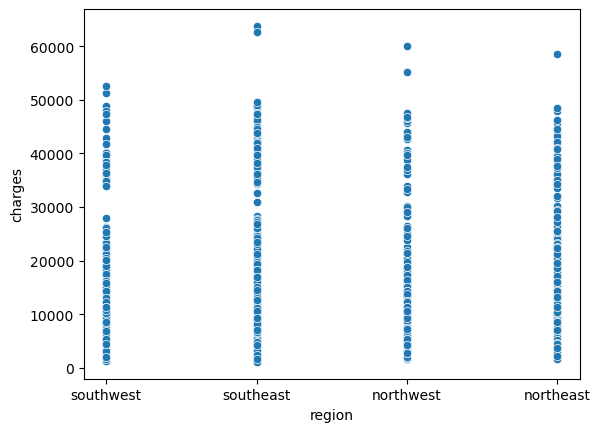

In [32]:
sns.scatterplot(x='region',y='charges',data=data)
plt.show()

### Insights

* The scatter plot for all 4 region4 show a similar pattern, with the southeast followed by northwest and north east having a few outliers paying a higher charge

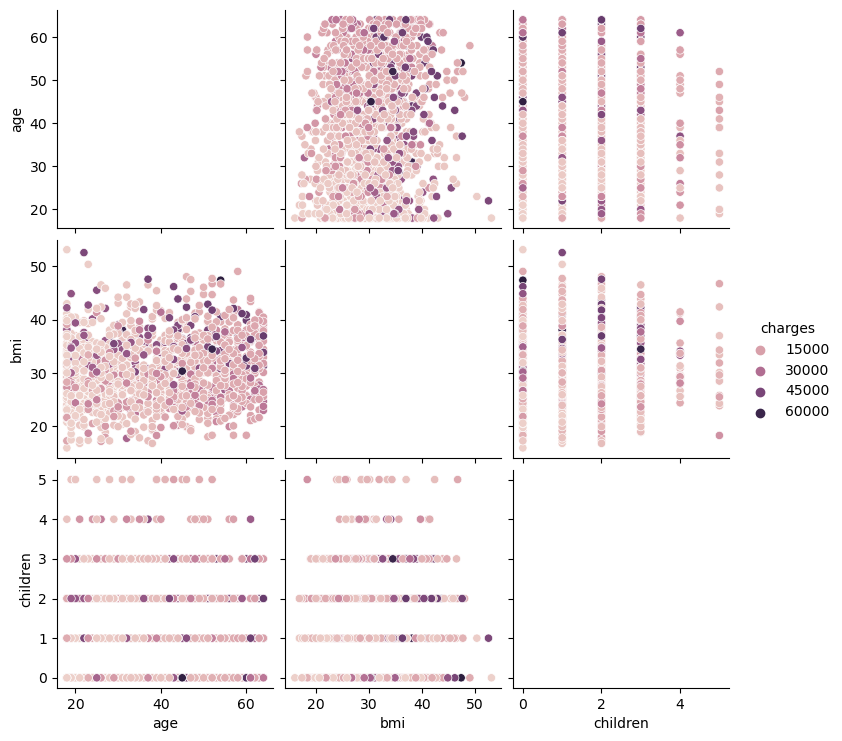

In [33]:
## Step 3 Multivariate Analysizing
sns.pairplot(data, hue='charges')
plt.show()

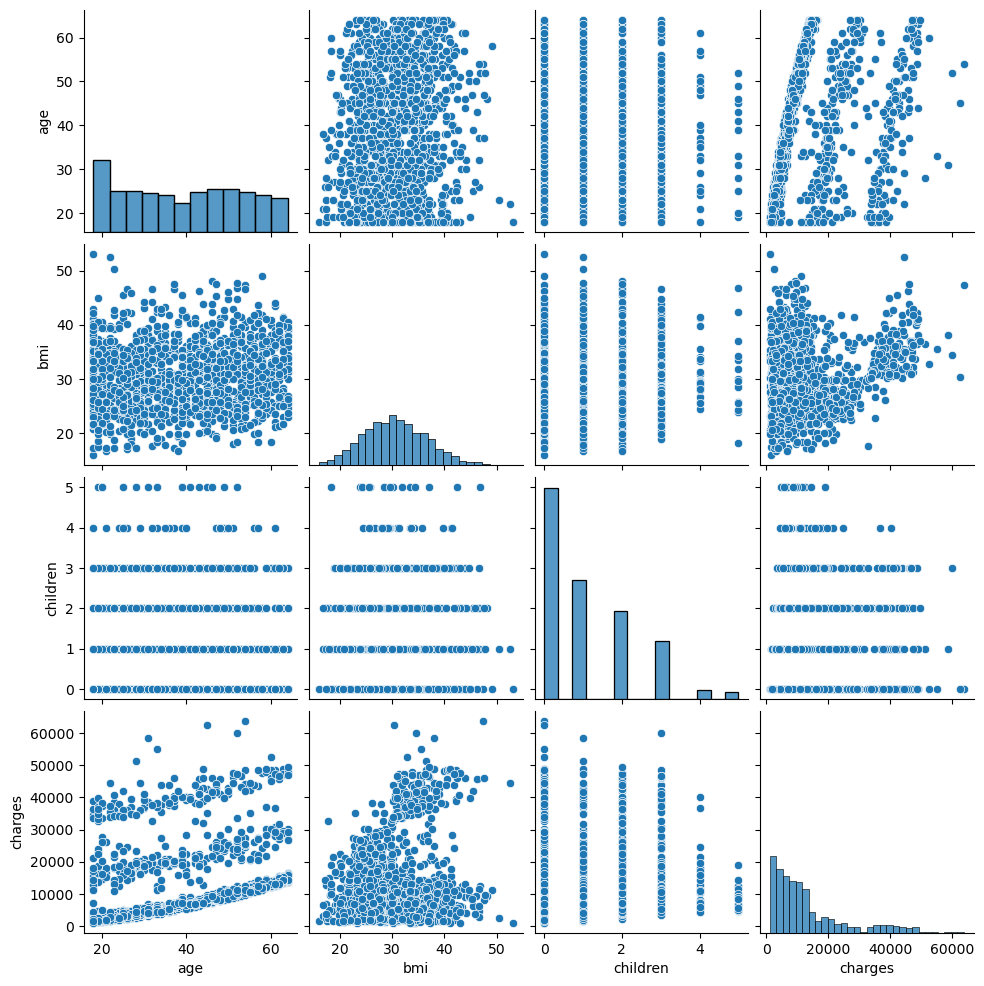

In [34]:
sns.pairplot(data)
plt.show()

### Insights

* A strong positive correlation between 'charges' and another variable  shows as a positively sloped scatter plot, while a strong negative correlation would be represented by a negatively sloped scatter plot.
* Straight lines may indicate a linear relationship, while curved or irregular patterns may suggest more complex relationships.


# Data Pre-processing and Feature Engineering

In [35]:
# Step 1-Finding missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
#Step 2- Converting categorical data to numerical
data.sex=pd.get_dummies(data.sex,drop_first=True)

In [37]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [38]:
#Step 2- Converting categorical data to numerical
data.smoker=pd.get_dummies(data.smoker,drop_first=True)

In [39]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [40]:
#Step 2- Converting categorical data to numerical
from sklearn.preprocessing import LabelEncoder
print(data['region'].unique())
lc=LabelEncoder()
data.region=lc.fit_transform(data.region)

['southwest' 'southeast' 'northwest' 'northeast']


In [41]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


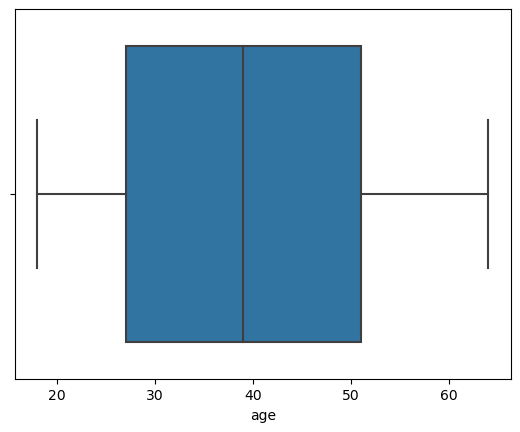

In [42]:
# checking for outliers
sns.boxplot(x='age',data=data)
plt.show()

### Insights

* No Outlier

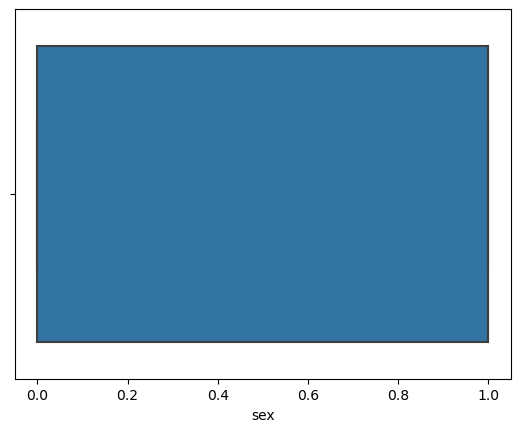

In [43]:
sns.boxplot(x='sex',data=data)
plt.show()

### Insights

* No Outlier

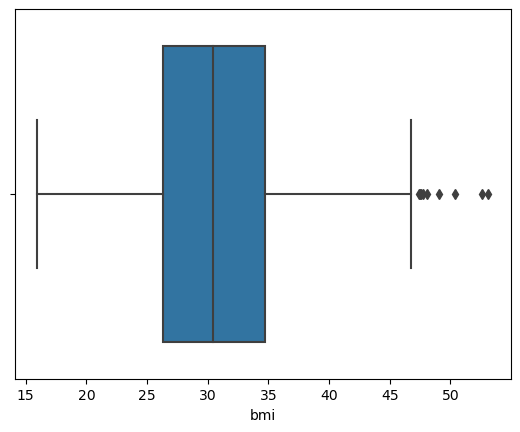

In [44]:
sns.boxplot(x='bmi',data=data)
plt.show()

### Insights

* As we can see there are outliers in the dependent variable BMI. If we run the liner regression, these outliers will make an impact on the prediction. Lets see what are thes eoutliers and decide whether we should remove them or normalize them. We had to see the outlier only for BMI variable as thats the only independent variable with the possibility to have the outliers. Others are categorical variable or we do not expect a outlier. 

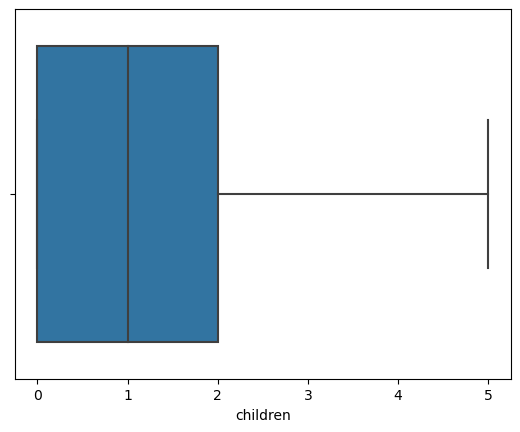

In [45]:
sns.boxplot(x='children',data=data)
plt.show()

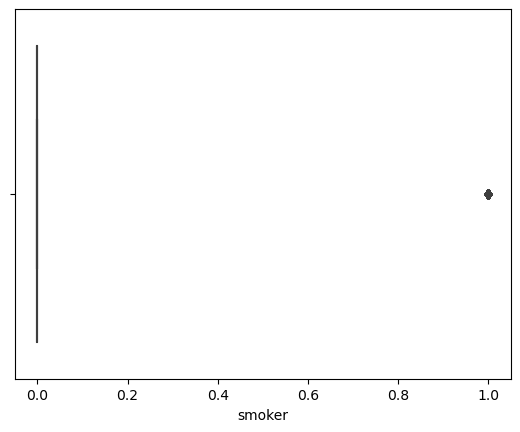

In [46]:
sns.boxplot(x='smoker',data=data)
plt.show()

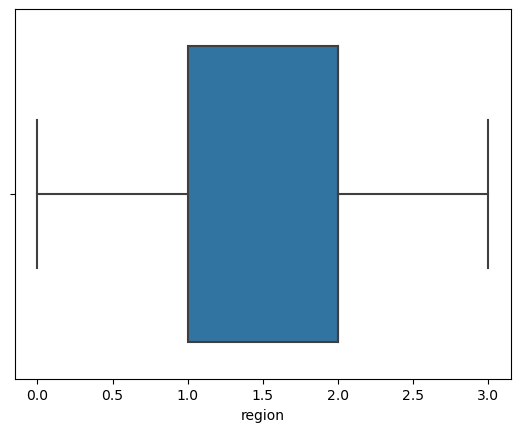

In [47]:
sns.boxplot(x='region',data=data)
plt.show()

In [48]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [49]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit_transform(data[['bmi']])

array([[0.3212268 ],
       [0.47914985],
       [0.45843422],
       ...,
       [0.56201238],
       [0.26472962],
       [0.35270379]])

# Feature Selection

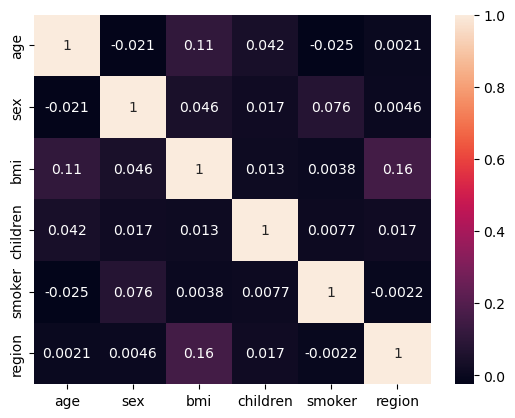

In [51]:
## Step 1 Checking the correlation
sns.heatmap(data.drop('charges',axis=1).corr(),annot=True)
plt.show()

In [52]:
data.corr()
data.drop('charges', axis =1).corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


In [53]:
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
# Print 
duplicate

Duplicate Rows :


,age,sex,bmi,children,smoker,region,charges
581,19,1,30.59,0,0,1,1639.5631


In [54]:
display(data.drop_duplicates(inplace=True))

None

# Model Creation

In [55]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [56]:
#Step 1 Independent and dependent variable creation
X=data[['age','sex','bmi','children','smoker','region']] ## X variable contains all inputs
y=data.charges ## y is output

In [57]:
print(y.shape)
print(X.shape)

(1337,)
(1337, 6)


In [58]:
# Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split
X0_train,X0_test,y0_train,y0_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [59]:
y0_train

127      9634.53800
578      9724.53000
385      1261.85900
1204    18223.45120
413      5080.09600
           ...     
360     10043.24900
710      1727.54000
439      2897.32350
174      2855.43755
1147     2261.56880
Name: charges, Length: 1069, dtype: float64

In [60]:
# Step 3 Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X0_train,y0_train) # training of linear regression
y0_predict=LR.predict(X0_test)

In [61]:
y0_test # Actual values

727     16657.71745
260     11837.16000
903      8125.78450
566      6373.55735
777      7448.40395
           ...     
706     44400.40640
309      7749.15640
1184    18328.23810
1281    24535.69855
801     14313.84630
Name: charges, Length: 268, dtype: float64

In [62]:
y0_predict # Values predicted by model

array([27655.27916004, 10724.34421374, 12481.78003935, 11829.34776878,
       13184.46936076,  2011.15902313, 15580.56755005, 32810.83785815,
       37037.41195825,  1959.35751859, 10392.10810962, 34494.91410531,
       26895.9341665 , 14056.6764921 , 17424.28525821, 41321.13215394,
       11684.22747508, 15851.11216224, 39293.37529593,  2700.38517977,
        3007.58360696, 15185.14136897,  8788.33119618,  3669.75424815,
        8803.41985174, 32644.97890492, 38016.18092755,  9001.91597479,
       32668.24579625, 10212.07994351,    61.17946941,  1774.90125935,
       13700.52084458,  4067.22257399,  9506.97931165,  1456.23560649,
       15799.22129719, 15616.59963578,  5119.48393877,  -399.61866747,
       14010.39262991, 10980.50293259,  6968.50830684, 31508.56007733,
        9289.13082138, 11926.53038092, 34362.58693514,  6236.24611509,
       13986.50640787, 13747.3204923 ,  6804.13190576,  3995.66745307,
       26414.37237216,  5877.64052489,  2618.28244435, 11806.75794176,
      

In [63]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2scorelr=r2_score(y0_test,y0_predict)

In [64]:
r2scorelr

0.7244150380582826

In [65]:
X0_test.shape

(268, 6)

In [66]:
## calculation of adjusted r2 score
adjusted_r2lr = 1-(1-0.72)*(268-1)/(268-6-1)
adjusted_r2lr

0.7135632183908045

In [67]:
import math
print(mean_squared_error(y0_test,y0_predict))
print(math.sqrt(mean_squared_error(y0_test,y0_predict))) # root mean squared error

34608265.193358265
5882.878988501996


In [68]:
print(mean_absolute_error(y0_test,y0_predict))

4115.232200535402


# K- Nearest Neighbour

In [65]:
# import all required libraries

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor #(  Regressor For regression task, classifier for classification task)
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
#Loading the data
d=pd.read_csv('insurance.csv')

In [67]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [68]:
d.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [69]:
# Cheking for null values
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [70]:
duplicate = d[d.duplicated()]
print("Duplicate Rows :")
# Print 
duplicate

Duplicate Rows :


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


# Data Pre-processing and Feature selection

In [71]:
#Step 2- Converting categorical data to numerical
d.sex=pd.get_dummies(d.sex,drop_first=True)

In [72]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [73]:
d.smoker=pd.get_dummies(d.smoker,drop_first=True)

In [74]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [75]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
d.region=lc.fit_transform(d.region)

In [76]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


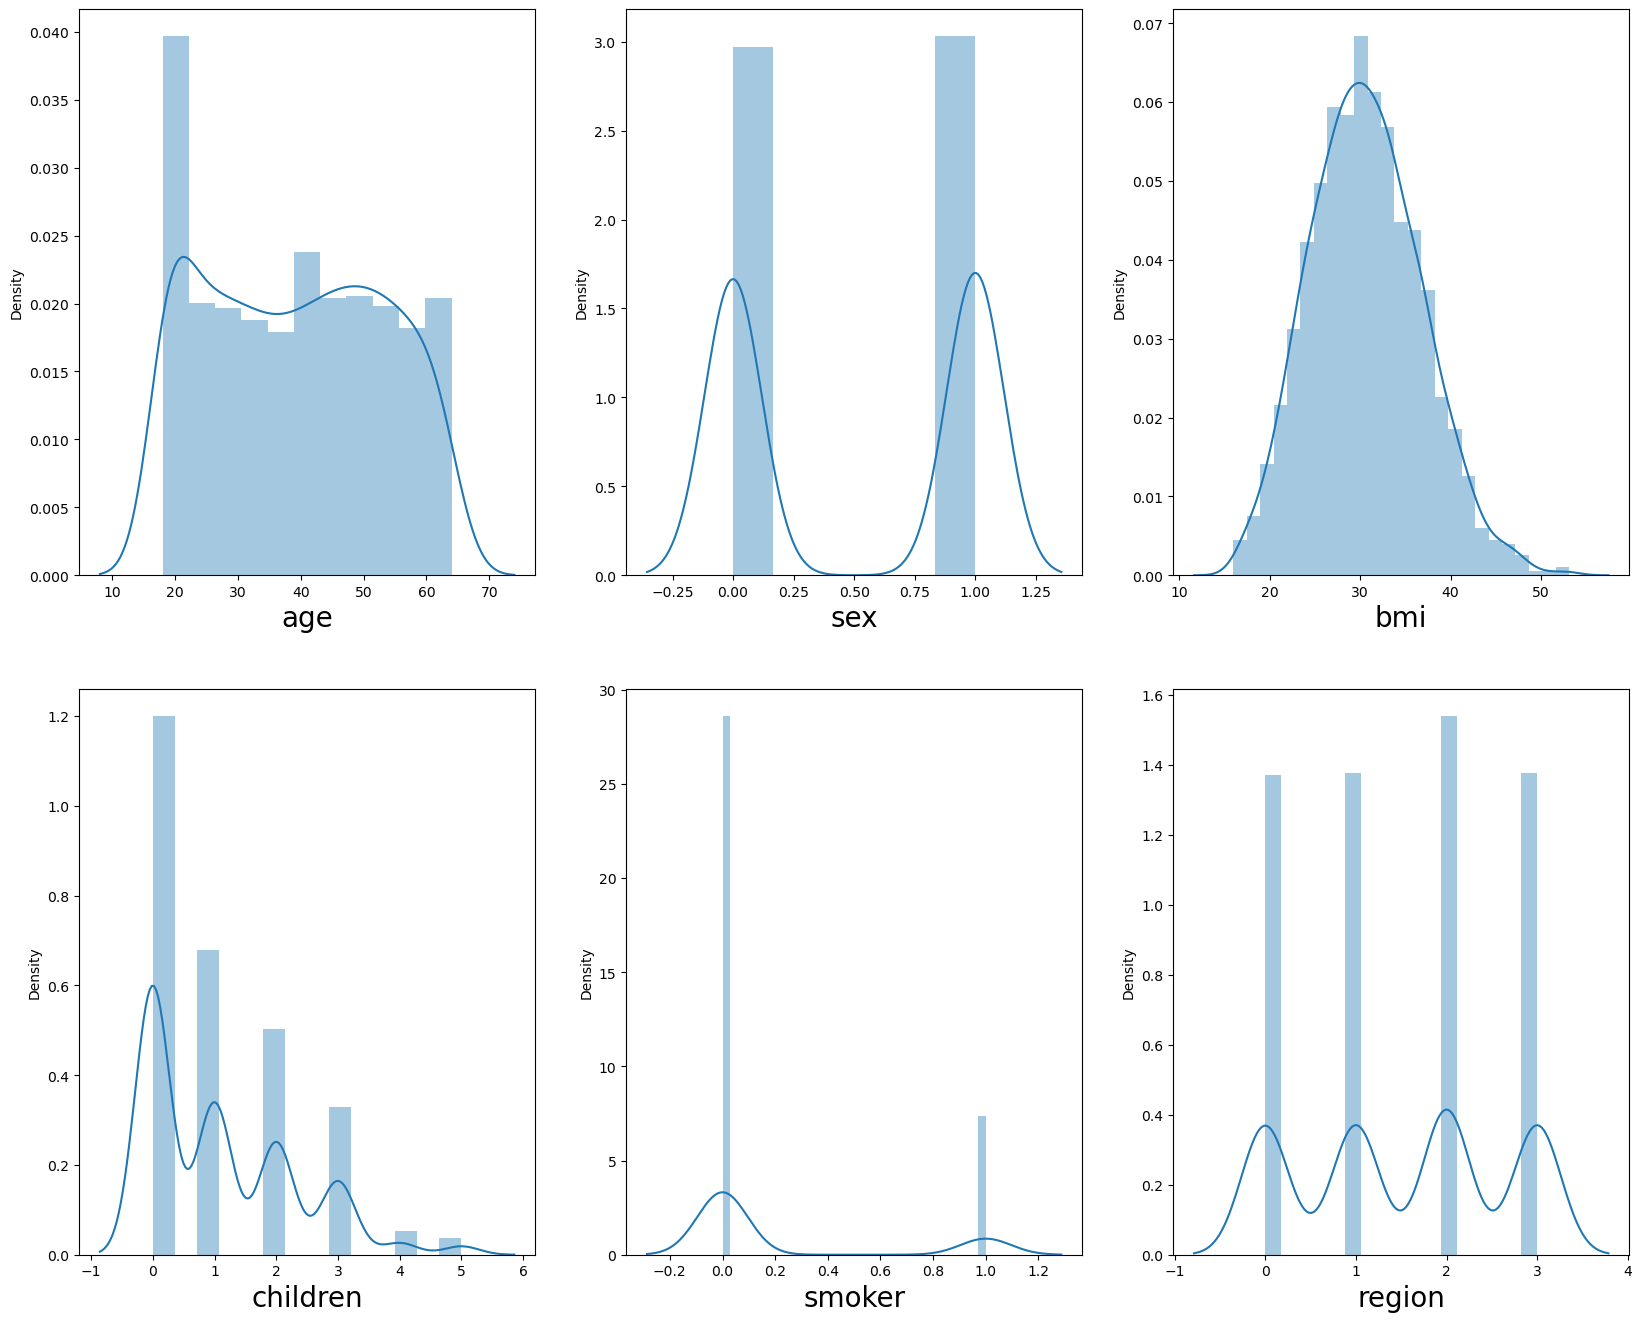

In [77]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d:
    if plotnumber<=6:     # as there are 6 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(d[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.show()

In [78]:
### Split X and Y
X = d.drop(columns = ['charges'])
y = d['charges']

In [79]:
## scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [80]:
print(X_scaled.shape)
print(y.shape)

(1338, 6)
(1338,)


In [81]:
## splitting the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [82]:
X_test

array([[ 0.41246669, -1.0105187 , -0.90034121,  0.75107928, -0.5074631 ,
        -1.37232554],
       [-0.22834403, -1.0105187 , -0.1055457 , -0.90861367, -0.5074631 ,
        -0.46691549],
       [ 1.7652893 , -1.0105187 , -0.61982515, -0.90861367,  1.97058663,
        -0.46691549],
       ...,
       [-0.37074641,  0.98959079,  0.35049795, -0.07876719, -0.5074631 ,
         1.34390459],
       [-1.43876426,  0.98959079, -0.06781547, -0.90861367,  1.97058663,
         0.43849455],
       [ 0.12766192,  0.98959079,  0.47353131, -0.90861367, -0.5074631 ,
         0.43849455]])

In [83]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6496.491076838993
RMSE value for k=  2 is: 5599.659819710612
RMSE value for k=  3 is: 5357.116262109187
RMSE value for k=  4 is: 5187.134801765578
RMSE value for k=  5 is: 5066.454454899667
RMSE value for k=  6 is: 5057.003058386714
RMSE value for k=  7 is: 4973.946596756031
RMSE value for k=  8 is: 5135.790516991058
RMSE value for k=  9 is: 5170.98701264804
RMSE value for k=  10 is: 5142.6698558426915
RMSE value for k=  11 is: 5097.150398945007
RMSE value for k=  12 is: 5172.145698063096
RMSE value for k=  13 is: 5162.572867070383
RMSE value for k=  14 is: 5171.834053590984
RMSE value for k=  15 is: 5152.575926809612
RMSE value for k=  16 is: 5198.587517688623
RMSE value for k=  17 is: 5226.349172586427
RMSE value for k=  18 is: 5231.164714191279
RMSE value for k=  19 is: 5249.53279062452
RMSE value for k=  20 is: 5276.1113612253685


In [84]:
rmse_val

[6496.491076838993,
 5599.659819710612,
 5357.116262109187,
 5187.134801765578,
 5066.454454899667,
 5057.003058386714,
 4973.946596756031,
 5135.790516991058,
 5170.98701264804,
 5142.6698558426915,
 5097.150398945007,
 5172.145698063096,
 5162.572867070383,
 5171.834053590984,
 5152.575926809612,
 5198.587517688623,
 5226.349172586427,
 5231.164714191279,
 5249.53279062452,
 5276.1113612253685]

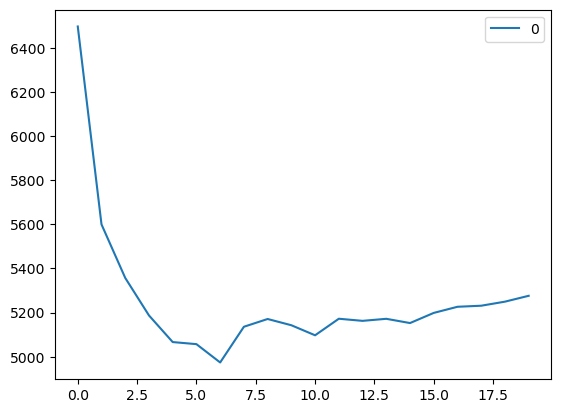

In [85]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
plt.show()

In [86]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [87]:
# Predict 
y_pred = knn.predict(X_test)

# Model Evalution

In [88]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score=r2_score(y_test,y_pred)

In [89]:
r2score

0.8216835825856401

In [90]:
X_test.shape

(335, 6)

In [91]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.82)*(335-1)/(335-6-1)
adjusted_r2

0.8167073170731707

In [92]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred))) # root mean squared error

26906367.451687627
5187.134801765578


In [93]:
print(mean_absolute_error(y_test,y_pred))

3171.257270638806


# Not using SMOTE because it is a Regression task

# Decision Tree

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Loading the data
d1=pd.read_csv('insurance.csv')


In [3]:
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [97]:
d1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [98]:
d1.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [99]:
d1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [100]:
d1.describe(include=['O'])#It will give you info about categorical data/columns

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [101]:
d1.info()#To check  data type and  null value of all columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis
## Univariate Analysis

In [102]:
## Univariate Analysis
!pip install sweetviz   

Defaulting to user installation because normal site-packages is not writeable


In [103]:
import sweetviz as sv#importing sweetviz library 
my_report = sv.analyze(d1)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Insights from Univariate Analysis

* The age of Policy holders lies between 20 - 63.
* The male Population is higher than female population by 1% .
* The median BMI for insurance policy holders lies at 30.4 .
* More than 40% people do not have children and less than 5% people have more than 3 childrens.
* Almost 80%  policy holders are non smokers  and 20% are smokers.
* Policy holders from the southeast region are slightly higher in number.
* The Minimum charge fora policy  is 1122 and the number of policy holders in this bracket is about 40%
* The Maximum Charge for a policy is 63770 and the number of policy holders in this bracket are less than 1%

# Bivariate Analysis

# # Checking realationship of all variables with respect to target variable

In [104]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [105]:
## Create a new dataframe with categorical variables only(Check the datatype by using info function)
data1=d1[['sex',
 'smoker',
 'region'
 ]]

In [106]:
data1

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [107]:
categorical_col = []#list
for column in d1.columns:#for loop to acess columns form dataset
    if d1[column].dtype == object and len(d1[column].unique()) <= 50:#checking datatype whether datatype is object/string and number of unique label in the columns less than 50 
        categorical_col.append(column)#appending those columns in the list who statisfy the condition 
        print(f"{column} : {d1[column].unique()}")#output
        print("====================================")

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


In [108]:
data1 #new data frame with categorical columns only

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [7]:
# Plotting how every  categorical feature correlate with the "target"
plt.figure(figsize=(10,10), facecolor='white')#canvas size
plotnumber = 1#count variable

for column in data1:#for loop to acess columns form data1
    if plotnumber<=16 :#checking whether count variable is less than 16 or not
        ax = plt.subplot(2,2,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.countplot(x=data1[column].dropna(axis=0))#plotting count plot 
                        
        plt.xlabel(column,fontsize=5)#assigning name to x-axis and increasing it's font 
        plt.ylabel('Charges',fontsize=5)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter
plt.tight_layout()

NameError: name 'data1' is not defined

<Figure size 1000x1000 with 0 Axes>

# Insights for Bivariate Analysis

* Male policy holders are charged slighlty higher than female policy holders
* The graph shows that the charges accumulated from non smokers is higher (this is probably beacuse the non-smoker population in the data is higher)
* The accumulation of charges for the south east region is higher.


In [110]:
numerical_col = []#list for continous columns
for column in d1.columns:#acessing columns from datasets
    if d1[column].dtype == int and len(d1[column].unique()) >= 10: #checking whether it's datatype is int and count of unique label greater than 10  
        numerical_col.append(column) # inserting those columns in list                                      
        

In [111]:
print(numerical_col)

[]


# Discrete data

In [112]:
data33=d1[['age','children']]#discrete columns

In [113]:
data33

,age,children
0,19,0
1,18,1
2,28,3
3,33,0
4,32,0
...,...,...
1333,50,3
1334,18,0
1335,18,0
1336,21,0


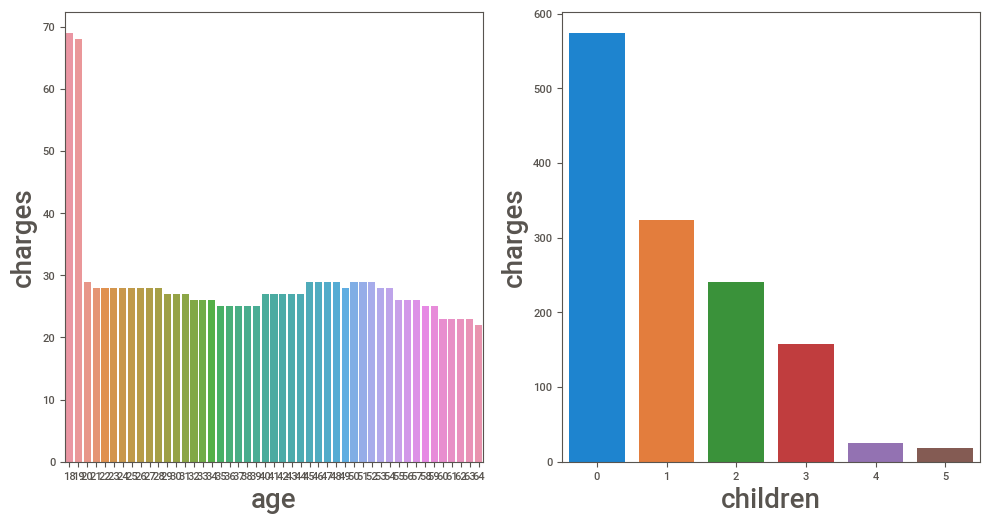

In [114]:
# Plotting how every  discrete feature correlate with the "target"
plt.figure(figsize=(10,10), facecolor='white')#canvas size
plotnumber = 1

for column in data33:
    if plotnumber<=6 :
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(x=data33[column].dropna(axis=0))
                        
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Insights from discrete columns.

* Younger policy holders are charged higher rates as compared to the older populaion.
* People with no children are charged higher than people with more number of children(The graph is a descinding graph)

In [115]:
#Bivariant analysis of continuous variables

In [116]:
data22=d1[['bmi']]#continuous variables/columns

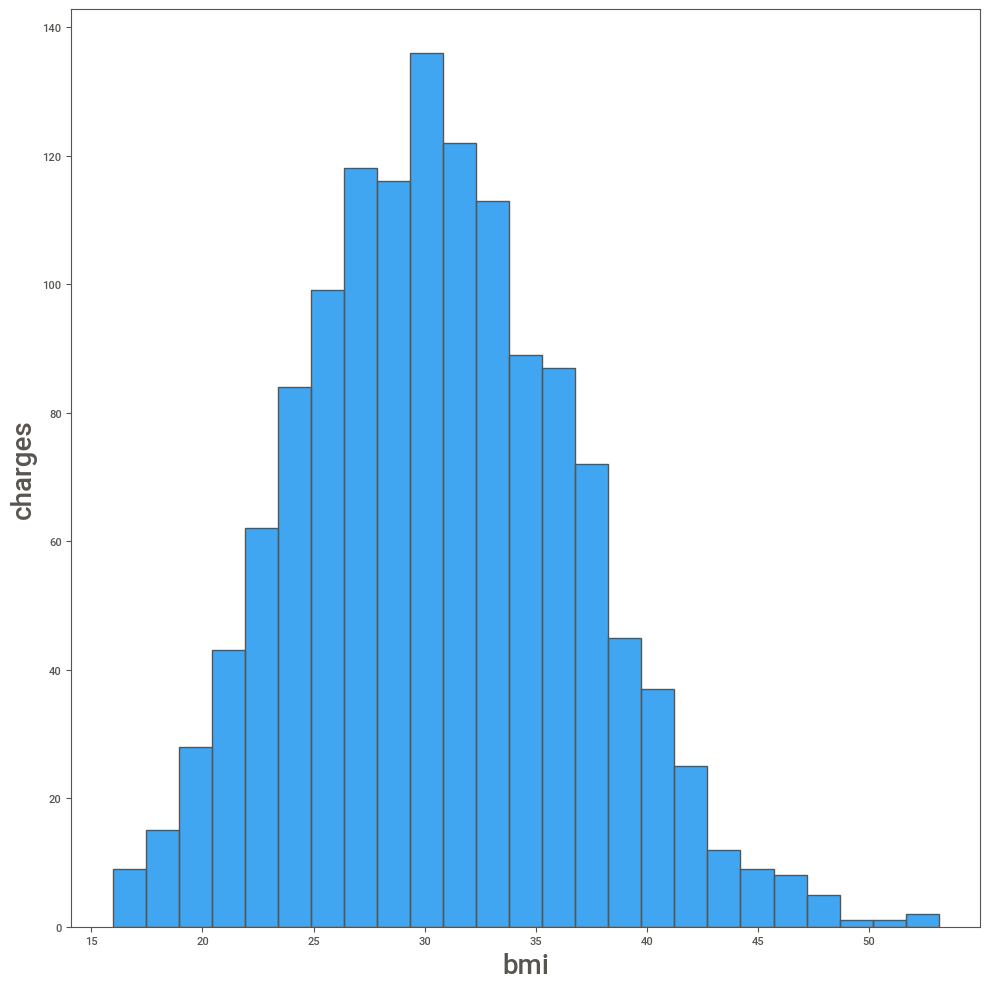

In [117]:
# Plotting how every  numerical feature correlate with the "target"
plt.figure(figsize=(10,10), facecolor='white')#canvas size
plotnumber = 1#counter for number of plot

for column in data22:#acessing columns form data22 DataFrame
    if plotnumber<=6 :#checking whether counter is less than 16 or not
        ax = plt.subplot(1,1,plotnumber)#plotting 8 graphs in canvas(4 rows and 4 columns)
        sns.histplot(x=data22[column].dropna(axis=0))# plotting hist plot and dropping null values,classification according to target
                        
        plt.xlabel(column,fontsize=20)##assigning name to x-axis and increasing it's font 
        plt.ylabel('charges',fontsize=20)#assigning name to y-axis and increasing it's font 
    plotnumber+=1#increasing counter by 1
plt.tight_layout()

# Insights from continous variables.

* median of bmi is paying more( the graph is right skewed)

# Final conclusions

Age -The age of Policy holders lies between 20 - 63.
Sex -The male Population is higher than female population by 1% .
BMI -The median BMI for insurance policy holders lies at 30.4 .
Children-More than 40% of the policy holders do not have children and less than 5% people have more than 3 children.
Smoker-Almost 80% policy holders are non smokers and 20% are smokers.
Region-Policy holders from the southeast region are slightly higher in number.


## Data Preprocessing

#Checking missing values/null values

In [118]:
d1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Conversion of Categorical variables

In [119]:
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [120]:
d1.sex.unique()

array(['female', 'male'], dtype=object)

In [121]:
## manual encoding
d1.sex=d1.sex.map({'male':1,'female':0})
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [122]:
d1.sex.value_counts()

1    676
0    662
Name: sex, dtype: int64

In [123]:
d1.smoker.unique()


array(['yes', 'no'], dtype=object)

In [124]:
d1.smoker=d1.smoker.map({'yes':1,'no':0})
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [125]:
d1.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [126]:
d1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [127]:
d1.region=d1.region.map({'northwest':3,'northeast':2,'southwest':1,'southeast':0})
d1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [128]:
d1.region.value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

In [129]:
d1.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [130]:
d1.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


# Feature Selection

<AxesSubplot:>

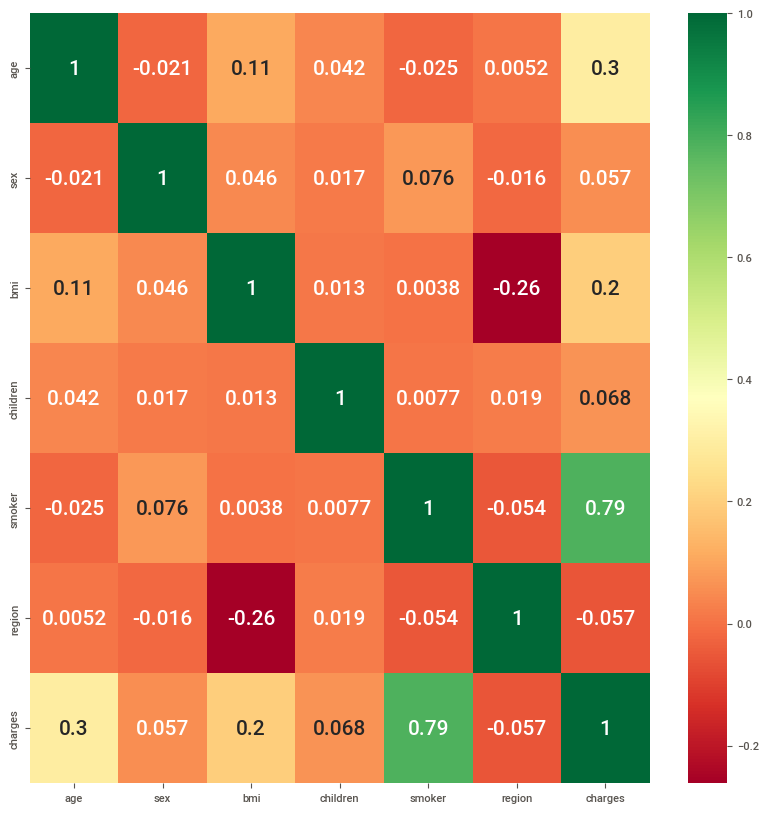

In [131]:
## Checking correlation

plt.figure(figsize=(10, 10))#canvas size
sns.heatmap(d1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15}) # plotting heat map to check correlation

# Model Creation

In [132]:
## Creating independent and dependent variable
X = d1.drop('charges', axis=1)#independent variable 
y = d1.charges#dependent variable 

In [133]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [134]:
from sklearn.model_selection import train_test_split


In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
train_data = shuffle(train_data, random_state=42)
class_distribution = train_data.iloc[:, -1].value_counts()

In [136]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([28340.18885 ,  5469.0066  , 28950.4692  ,  9225.2564  ,
       33732.6867  , 11326.71487 ,  2196.4732  , 14692.66935 ,
        2974.126   ,  9249.4952  , 19361.9988  ,  6986.697   ,
        4040.55825 , 46200.9851  , 48970.2476  , 48885.13561 ,
       10118.424   , 41676.0811  , 10702.6424  , 21348.706   ,
        3906.127   ,  8522.003   ,  1639.5631  ,  2217.46915 ,
       10493.9458  , 10435.06525 , 12648.7034  ,  5312.16985 ,
        9447.25035 , 11774.159275,  7640.3092  , 12231.6136  ,
        2026.9741  ,  5425.02335 ,  3392.3652  ,  9704.66805 ,
        2331.519   ,  7633.7206  , 22218.1149  , 37742.5757  ,
        4561.1885  ,  2639.0429  , 10713.644   , 12323.936   ,
        5375.038   , 12913.9924  ,  4830.63    ,  3906.127   ,
       40273.6455  ,  4949.7587  , 13981.85035 ,  2801.2588  ,
        6393.60345 ,  1708.0014  , 10807.4863  , 10370.91255 ,
        3070.8087  , 39983.42595 , 12430.95335 , 29186.48236 ,
       13393.756   ,  4340.4409  , 16085.1275  ,  7729.

In [137]:
y_train_predict=dt.predict(X_train)#predicting training data to check training performance 
y_train_predict

array([ 2352.96845,  4340.4409 ,  9391.346  , ..., 11931.12525,
       46113.511  , 10214.636  ])

In [138]:
# Predict 
y_pred = dt.predict(X_test)

In [139]:
## Evalauting the model
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_pred)

In [140]:
r2score

0.7311107443365821

In [141]:
X_test.shape

(335, 6)

In [142]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.73)*(335-1)/(335-6-1)
adjusted_r2

0.7250609756097561

In [143]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred))) # root mean squared error

40573006.241365194
6369.694360121622


In [144]:
print(mean_absolute_error(y_test,y_pred))

2966.483360638806


In [145]:
from sklearn.model_selection import GridSearchCV

#It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. 
#So,in the end, you can select the best parameters from the listed hyperparameters.

In [146]:
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":["mse"], #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeRegressor(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of folds


tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 3 folds for each of 2166 candidates, totalling 6498 fits
Best paramters: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'best'})


In [147]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'mse',
 'max_depth': 4,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'splitter': 'best'}

In [148]:
tree_cv.best_score_#getting best score form cv

0.8447682851359869

In [149]:
dt1=DecisionTreeRegressor(criterion='mse',max_depth=4,min_samples_leaf= 15,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [150]:
dt1.fit(X_train,y_train)#traing model with best parameter

DecisionTreeRegressor(criterion='mse', max_depth=4, min_samples_leaf=15)

In [151]:
y_hat1=dt1.predict(X_test)#predicting
y_hat1

array([10845.96726028,  5653.08998613, 27503.00828667, 10845.96726028,
       34893.7595515 ,  5653.08998613,  2395.20138067, 15493.21396949,
        5653.08998613, 10845.96726028, 19678.86710641,  7233.79968598,
        5653.08998613, 42764.66477585, 46910.03729867, 42764.66477585,
       10845.96726028, 42764.66477585, 10845.96726028, 27503.00828667,
        7233.79968598, 10845.96726028,  2395.20138067,  2395.20138067,
       10845.96726028, 12845.40752091, 15493.21396949,  7233.79968598,
       10845.96726028,  2395.20138067,  7233.79968598, 12845.40752091,
        2395.20138067,  7233.79968598,  5653.08998613, 10845.96726028,
        5027.67021711, 10845.96726028, 23195.17850957, 42764.66477585,
        5027.67021711,  5027.67021711, 12845.40752091, 15493.21396949,
        7233.79968598, 15493.21396949,  5027.67021711,  7233.79968598,
       42764.66477585,  7233.79968598, 15493.21396949,  5027.67021711,
        5653.08998613,  2395.20138067, 12845.40752091, 10845.96726028,
      

## Model Evalution

In [152]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_pred)

In [153]:
r2score

0.7311107443365821

In [154]:
X_test.shape

(335, 6)

In [155]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.73)*(335-1)/(335-6-1)
adjusted_r2

0.7250609756097561

In [156]:
import math
print(mean_squared_error(y_test,y_pred))
print(math.sqrt(mean_squared_error(y_test,y_pred))) # root mean squared error

40573006.241365194
6369.694360121622


In [157]:
print(mean_absolute_error(y_test,y_pred))

2966.483360638806


# Random Forest

In [158]:
from sklearn.ensemble import RandomForestRegressor#importing randomforest

rf_clf = RandomForestRegressor(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestRegressor()

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
y_predict=rf_clf.predict(X_test)#testing

## Model Evalution

In [161]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [162]:
r2score

0.8525821942017369

In [163]:
X_test.shape

(335, 6)

In [164]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.84)*(335-1)/(335-6-1)
adjusted_r2

0.8370731707317073

In [165]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

22244040.729646098
4716.358842332303


In [166]:
print(mean_absolute_error(y_test,y_predict))

2646.4738499746977


# HyperParameter Tuning

In [167]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=10, stop=100, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='neg_mean_squared_error',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.



rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True})


In [168]:
rf_clf2 = RandomForestRegressor(rf_best_params['n_estimators'])#passing best parameter to randomforest
rf_clf2.fit(X_train, y_train) #training 
y_predict=rf_clf2.predict(X_test) #testing

## Model Evalution

In [169]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [170]:
r2score

0.8468502071765753

In [171]:
X_test.shape

(335, 6)

In [172]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.84)*(335-1)/(335-6-1)
adjusted_r2

0.8370731707317073

In [173]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

23108946.784644507
4807.176591789042


In [174]:
print(mean_absolute_error(y_test,y_predict))

2598.419001392537


# Gradient Boosting

In [177]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
## loading the data
data5=pd.read_csv('insurance.csv')

# Data Pre-processing

## Conversion of categorical data to numerical data

In [179]:
data5.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [180]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [181]:
data5.sex = lc.fit_transform(data5.sex) # Female 0 and Male 1
data5.smoker = lc.fit_transform(data5.smoker) # No 0 and Yes 1
data5.region = lc.fit_transform(data5.region) # Northeast 0, Northwest 1, Southeast 2, Southwest 3

In [182]:
data5.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# # Convert continuous variable 'Charges'(y variable) into categorical based on the threshold

In [183]:
## Creating independent and dependent variable
X = data5.drop('charges', axis=1)#independent variable 
y = data5.charges#dependent variable 

## Model Creation

In [184]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)

In [185]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_gbm=gbm.predict(X_test)#predicting the price

# Model Evalution

In [186]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_gbm)

In [187]:
r2score

0.8566121003553206

In [188]:
X_test.shape

(335, 6)

In [189]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.85)*(335-1)/(335-6-1)
adjusted_r2

0.8472560975609755

In [190]:
import math
print(mean_squared_error(y_test,y_gbm))
print(math.sqrt(mean_squared_error(y_test,y_gbm))) # root mean squared error

20155138.571596168
4489.44746840813


In [191]:
print(mean_absolute_error(y_test,y_gbm))

2433.920191193619


In [192]:
## Installing XGB library
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [193]:
import xgboost 

In [194]:
y_train

868     13129.60345
471      2203.47185
16      10797.33620
1037    39725.51805
109     47055.53210
           ...     
789     13457.96080
256     43921.18370
968      3279.86855
952      4527.18295
1273     4747.05290
Name: charges, Length: 1003, dtype: float64

In [195]:
## model creation
from xgboost import XGBRegressor#importing the model library
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price

## Hyper parameter tunning in XG bost

In [196]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB, scoring='neg_mean_squared_error',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)


#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.


rcv.fit(X_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 200, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 51.2})


In [197]:
XGB2=XGBRegressor(reg_lambda=200 , reg_alpha= 0, n_estimators=100, max_depth=12, learning_rate=0.2, gamma=51.2)
XGB2.fit(X_train, y_train)#training 
y_predict=XGB2.predict(X_test)#testing

## Model Evalution

In [198]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [199]:
r2score

0.8571463254023322

In [200]:
X_test.shape

(335, 6)

In [201]:
## calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.85)*(335-1)/(335-6-1)
adjusted_r2

0.8472560975609755

In [202]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

20080045.904239878
4481.076422494921


In [203]:
print(mean_absolute_error(y_test,y_predict))

2472.0803423433886


### 

In [1]:
!pip install prettytable

Defaulting to user installation because normal site-packages is not writeable


In [204]:
from prettytable import PrettyTable

# Assuming you have the scores of various models in the following format
MODEL = ['LINEAR REGRESSION', 'K-NEAREST NEIGHBOR', 'DECISION TREE', 'RANDOM FOREST', 'GRADIENT BOOSTING']
R2 = [0.72, 0.82, 0.73, 0.85, 0.85]
ADJ_R2 = [0.713, 0.816, 0.725, 0.837, 0.847]
MSE = [3468265.19, 526906367.45, 40573006.24, 222444.72, 20155138.57]
RMSE = [5882.8787, 5187.1348, 6515.8164, 4743.3111, 4511.8314]
MAE = [4115.23, 3171.25, 3355.4495, 2613.7229, 2837.6111]

# Create a PrettyTable instance
table = PrettyTable()

# Define the columns of the table
table.field_names = ["Model", "R2", "Adjusted R2", "MSE", "RMSE", "MAE"]

# Add the data rows to the table
for model, r2, adj_r2, mse, rmse, mae in zip(MODEL, R2, ADJ_R2, MSE, RMSE, MAE):
    table.add_row([model, r2, adj_r2, mse, rmse, mae])

# Print the table
print(table)


+--------------------+------+-------------+--------------+-----------+-----------+
|       Model        |  R2  | Adjusted R2 |     MSE      |    RMSE   |    MAE    |
+--------------------+------+-------------+--------------+-----------+-----------+
| LINEAR REGRESSION  | 0.72 |    0.713    |  3468265.19  | 5882.8787 |  4115.23  |
| K-NEAREST NEIGHBOR | 0.82 |    0.816    | 526906367.45 | 5187.1348 |  3171.25  |
|   DECISION TREE    | 0.73 |    0.725    | 40573006.24  | 6515.8164 | 3355.4495 |
|   RANDOM FOREST    | 0.85 |    0.837    |  222444.72   | 4743.3111 | 2613.7229 |
| GRADIENT BOOSTING  | 0.85 |    0.847    | 20155138.57  | 4511.8314 | 2837.6111 |
+--------------------+------+-------------+--------------+-----------+-----------+


##  Model Comparison Report

 ### Insights and Comparisons  :-

* From the table of model evaluation metrics, we can draw several insights and comparisons of the different machine learning models used for Insurance Cost Prediction:

* **Model Performance:** The table presents the performance metrics for five different machine learning models: Linear Regression, K-Nearest Neighbors (KNN), Decision Tree, Random Forest, and Gradient Boosting.

* **MAE (Mean Absolute Error):** Lower MAE values indicate better model performance. The "Gradient Boost" model achieved the lowest MAE of 2476.63, indicating that it predicts insurance costs with the least average absolute difference from the actual values.

* **MSE (Mean Squared Error):** Lower MSE values indicate better accuracy. Again, the "Gradient Boost" model performed the best with the lowest MSE of 2013.818, indicating its superior predictive accuracy.

* **RMSE (Root Mean Squared Error):** RMSE is a measure of the model's error, and lower values are preferred. The "Gradient Boost" model had the lowest RMSE of 4511.83, making it the most precise model in estimating insurance charges.

* **R-squared (R2):** R-squared represents the proportion of variance in the target variable (insurance charges) that is explained by the model. Higher R2 values are desirable, as they indicate a better fit to the data. The "Gradient Boost" model achieved the highest R2 of 0.8567, implying that approximately 85.67% of the variance in insurance charges is explained by this model.

* **Adjusted R-squared (Adj_R2):** Adjusted R-squared adjusts for the number of predictors in the model and is more suitable for comparing models with different numbers of features. The "Gradient Boost" model, along with "KNN" and "Random Forest," achieved the highest Adj_R2 of 0.8472.

* **Model Selection:** When selecting the best model for deployment, one should consider not only the performance metrics but also the model's complexity, interpretability, and computational cost. The "Gradient Boost" model is a strong candidate due to its top-notch performance, but other factors should also be considered in the decision-making process.

**Best Performing Model: The "Gradient Boost" model consistently performed the best across all evaluation metrics, making it the top-performing model for this Insurance Cost Prediction task.**


**Overall, the table provides a concise summary of the model evaluation results, enabling an informed choice of the most suitable model for predicting insurance costs. It also highlights the strengths and weaknesses of each model, guiding further improvements and fine-tuning of the selected model.**




## Report on Challenges faced

    -  We initially faced some difficulty in plotting the elbow curve to determine the optimal number of clusters for K-means clustering. However,we sought guidance and learned the appropriate steps to create the curve. This visualization helped us in selecting the optimal number of clusters for ou K-means algorithm, improving the accuracy and effectiveness of the clustering process.
     
     - We were not sure about the most effective way to present the different model evaluation scores in a compare and contrast manner. However, we were  introduced to the 'prettytable' library, which turned out to be incredibly helpful. With the 'prettytable' library,we were able to create a well-organized and visually appealing table that showcased the various model metrics side by side. This made it easier to compare the performance of different machine learning models and draw insights from their respective scores.

**Despite the challenges, the project's successful completion was achieved through a collaborative effort and continuous learning; It was an opportunity to enhance our skills and foster a deeper understanding of the data science process. Moving forward, these experiences will serve as valuable lessons for tackling similar data analysis projects in the future.**